# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 21.09.2020

Мягкий дедлайн: 02:59MSK 05.10.2020

Жесткий дедлайн: 23:59MSK 08.10.2020

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 11.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
!pip install kaggle --upgrade
from google.colab import files
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.8)


In [5]:
!kaggle competitions download -c nyc-taxi-trip-duration

test.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!mkdir train
!unzip train.zip -d train
!mkdir test 
!unzip test.zip -d test

mkdir: cannot create directory ‘train’: File exists
Archive:  train.zip
replace train/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
mkdir: cannot create directory ‘test’: File exists
Archive:  test.zip
replace test/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
train = pd.read_csv("train/train.csv")
test = pd.read_csv("test/test.csv")

In [8]:
train.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455


In [9]:
test.head(1)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.75668,N


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [10]:
train = train.drop('dropoff_datetime', axis=1)

train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

In [11]:
print(train.dtypes,"\n\n",test.dtypes, sep="")

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
dtype: object


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [12]:
plt.rcParams['figure.figsize'] = [16, 10]

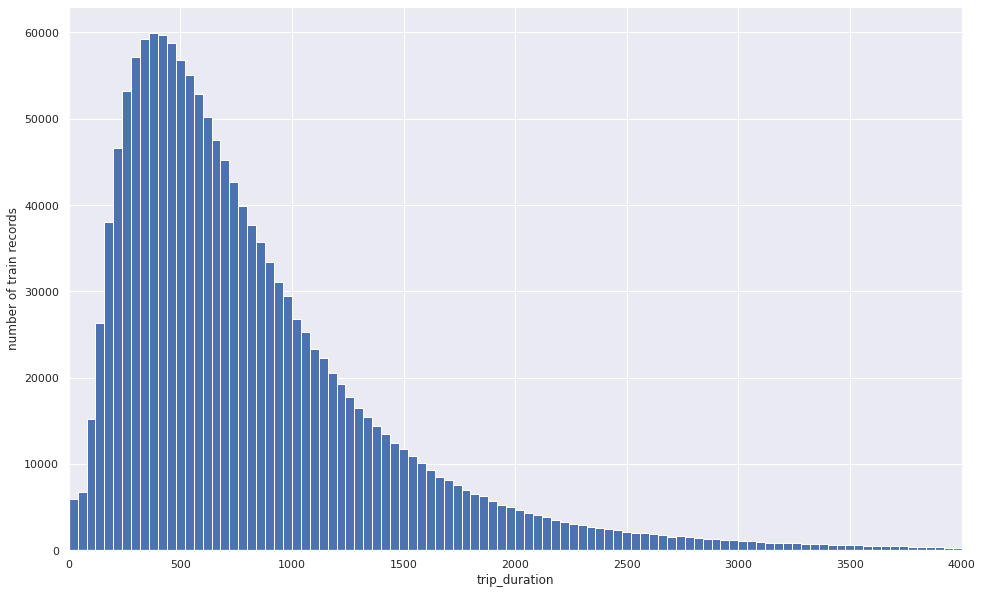

In [13]:
plt.hist(train['trip_duration'].values, range=(0, 4000), bins=100)
plt.xlim(0, 4000)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ:** Есть некоторые выбросы, но в целом распределение целевой переменной напоминает логнормальное распределение

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Во-первых RMSLE сильнее отражает если целевая переменная больше чем реальное значение, в сравнении с случаем когда целевая переменная меньше реального значения.

Во-вторых нам более логично оценивать относительную погрешность, то есть например настоящие значения (10, 100), одна модель предсказала (5, 95), вторая (10, 90). Конечно нам более интересно второе предсказание, так как 10 минут ошибки при длительности поездки 100 минут выглядят намного лучше, чем ошибка 5 минут (в 2 раза меньше) при 10 минутах.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 
> $$\text{MSE}(X, \hat{y}, \hat{a}) = \text{RMSE}(X, \hat{y}, \hat{a})^2 = \text{RMSLE}(X, y, a)^2$$
> Из этого равенства очевидно что оптимизации эквивалентны.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [14]:
train['log_trip_duration'] = np.log1p(train.trip_duration)

train = train.drop('trip_duration', axis=1)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [15]:
best_constant = train["log_trip_duration"].describe()['mean']
best_constant

from sklearn.metrics import mean_squared_error

print("Train MSE with best constant = %.4f" % mean_squared_error(train["log_trip_duration"], best_constant * np.ones(train["log_trip_duration"].shape)))

Train MSE with best constant = 0.6332


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


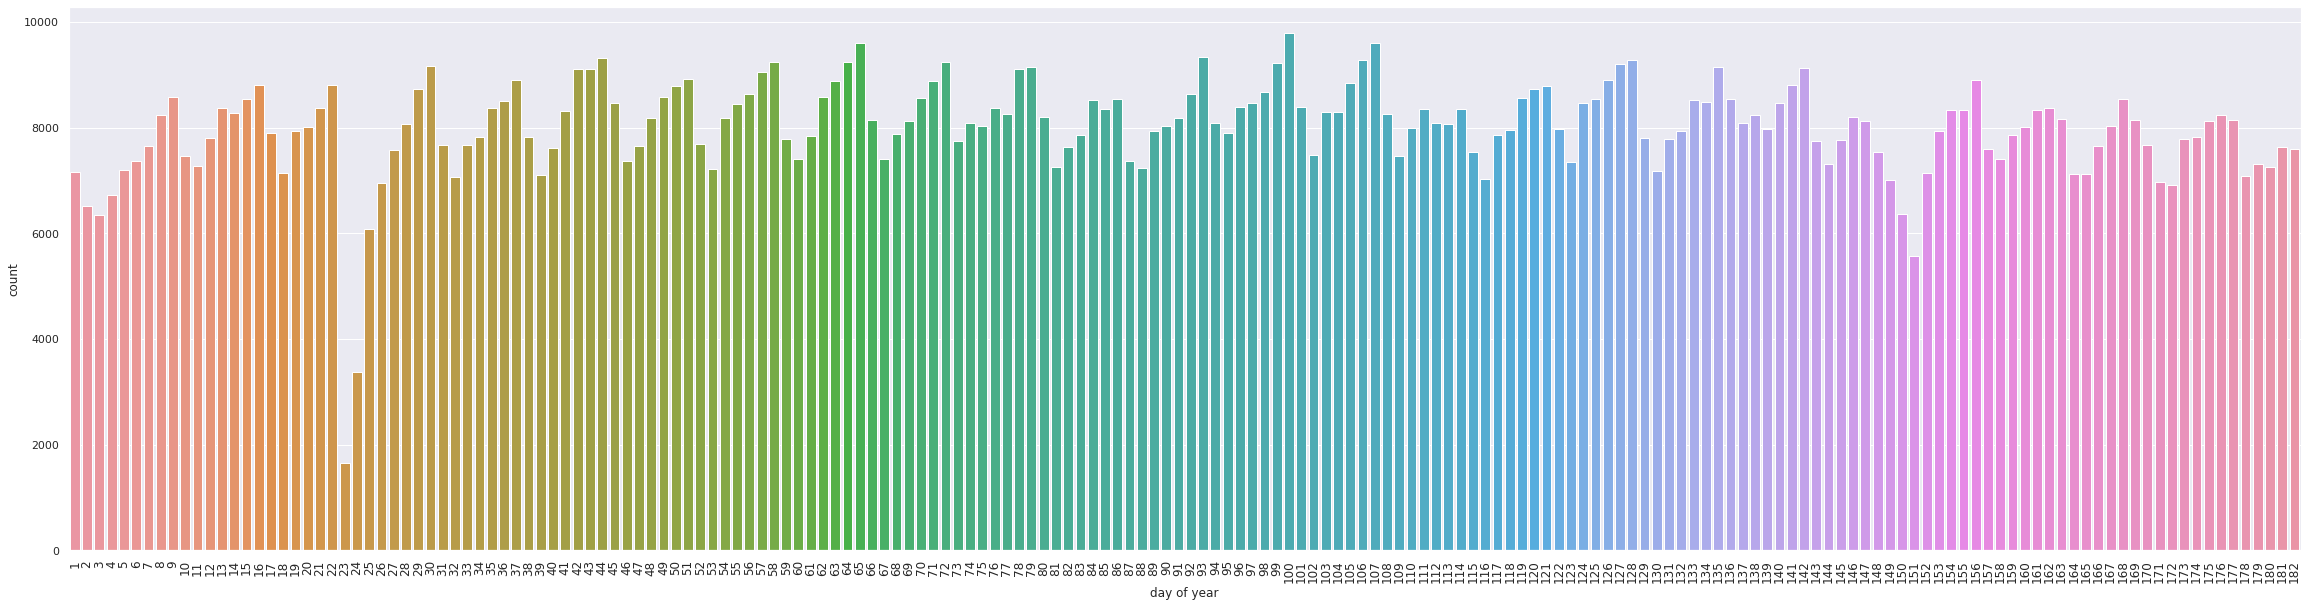

In [16]:
plt.rcParams['figure.figsize'] = [40, 10]
ax = sns.countplot(train["pickup_datetime"].dt.dayofyear)
plt.setp(ax.get_xticklabels(), rotation=90, size=12)
plt.xlabel("day of year")
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**: 
23-24 января сильные снегопады

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


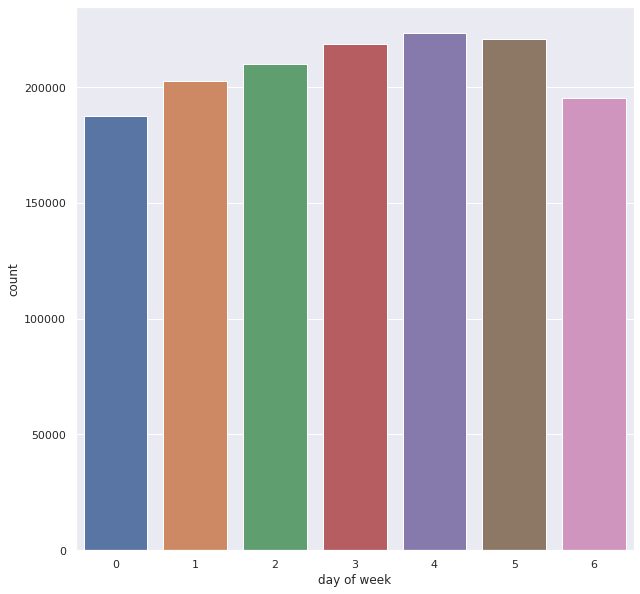

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


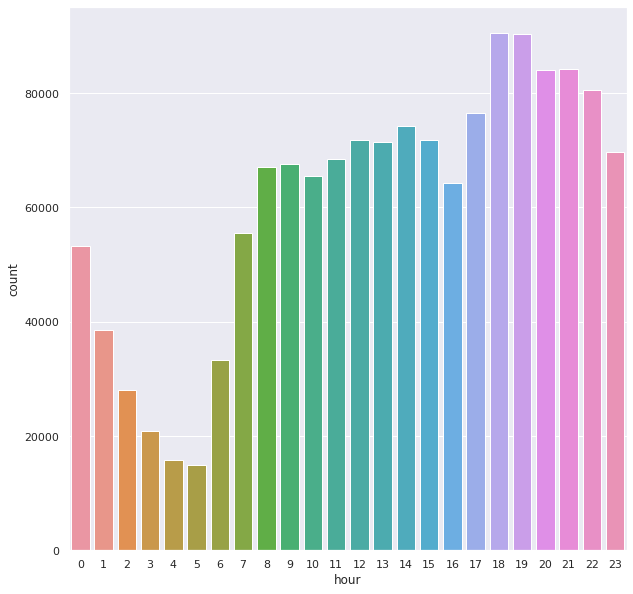

In [17]:
plt.rcParams['figure.figsize'] = [10, 10]

ax = sns.countplot(train["pickup_datetime"].dt.weekday)
plt.xlabel("day of week")
plt.show()

ax = sns.countplot(train["pickup_datetime"].dt.hour)
plt.xlabel("hour")
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

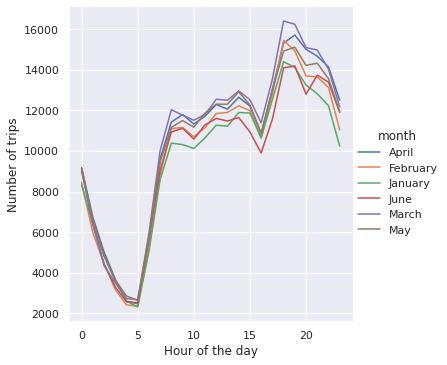

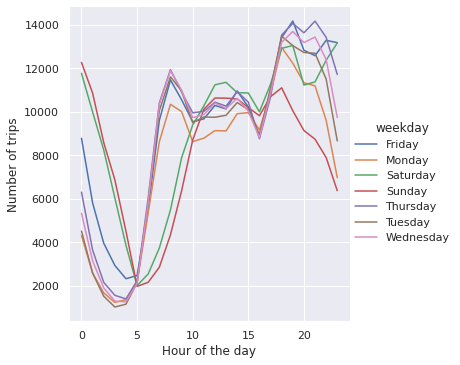

In [18]:
cur = pd.DataFrame({
  "month":train["pickup_datetime"].dt.month_name(), 
  "hour":train["pickup_datetime"].dt.hour, 
  "id": train["id"],
  "weekday":train["pickup_datetime"].dt.day_name(), 
})

sns.relplot(
  data=cur.groupby(["month", "hour"]).count()["id"].apply(int).reset_index(name="count"), 
  x="hour", y="count",
  hue="month", kind="line",
).set_axis_labels("Hour of the day", "Number of trips")
plt.show()

sns.relplot(
  data=cur.groupby(["weekday", "hour"]).count()["id"].apply(int).reset_index(name="count"), 
  x="hour", y="count",
  hue="weekday", kind="line",
).set_axis_labels("Hour of the day", "Number of trips")
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ:** Если посмотреть на графики то видно, что в выходные активность появляется примерно к обеду, а в будние дни с самого утра. Также вечером в выходные дни активность меньше, чем в будние дни. 
По месяцам кривые не сильно разнятся, но выделяются чуть-чуть январь и июнь, возможно это связано с тем, что в этом время новый год и лето - время когда больше людей отдыхает.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [19]:
train_size = train.shape[0]

test_ids = train.sample(n=int(train_size * 0.3), random_state=42)["id"]

data_test = train[train["id"].isin(test_ids)]
data_train = train[~train["id"].isin(test_ids)]

print("All size   =", train_size)
print("Train size =", data_train.shape[0])
print("Test size  =", data_test.shape[0])

All size   = 1458644
Train size = 1021051
Test size  = 437593


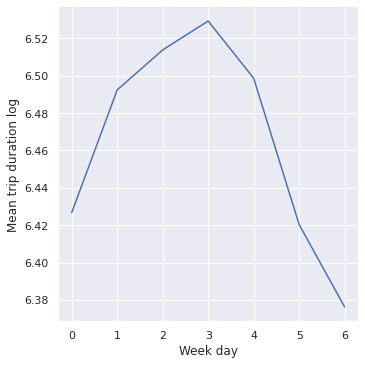

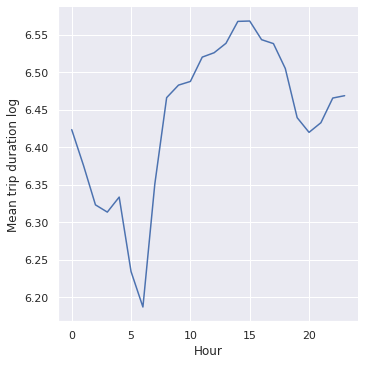

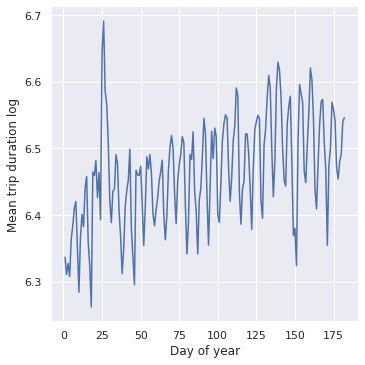

In [20]:
cur = pd.DataFrame({
  "log_trip_duration":data_train["log_trip_duration"], 
  "hour":data_train["pickup_datetime"].dt.hour,  
  "dayofyear":data_train["pickup_datetime"].dt.dayofyear,
  "weekday":data_train["pickup_datetime"].dt.dayofweek, 
})

sns.relplot(
  data=cur.groupby(["weekday"]).mean()["log_trip_duration"].reset_index(name="mean_log_trip_duration"), 
  x="weekday", y="mean_log_trip_duration",
  kind="line",
).set_axis_labels("Week day", "Mean trip duration log")
plt.show()

sns.relplot(
  data=cur.groupby(["hour"]).mean()["log_trip_duration"].reset_index(name="mean_log_trip_duration"), 
  x="hour", y="mean_log_trip_duration",
  kind="line",
).set_axis_labels("Hour", "Mean trip duration log")
plt.show()

sns.relplot(
  data=cur.groupby(["dayofyear"]).mean()["log_trip_duration"].reset_index(name="mean_log_trip_duration"), 
  x="dayofyear", y="mean_log_trip_duration",
  kind="line",
).set_axis_labels("Day of year", "Mean trip duration log")
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**:

1. Графики с таргетом и с кол-вом поездок схожи
2. В первый аномальный период длина поездок сильно больше, а во второй наоборот. 
3. На графике зависимости от дня в году видны колебания, как многократное повторение графика для дня в неделе. В целом тенденция положительная, к лету ездят меньше. Возможно из-за погоды



Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [21]:
def add_columns_1(data):
  data["dayofweek"] = data["pickup_datetime"].dt.dayofweek
  data["month"] = data["pickup_datetime"].dt.month
  data["hour"] = data["pickup_datetime"].dt.hour
  data["is_first_anomal"] = ((data["pickup_datetime"].dt.dayofyear >= 23) & (data["pickup_datetime"].dt.dayofyear <= 25)).map(lambda x: 1.0 if x else 0.0)
  data["is_second_anomal"] = ((data["pickup_datetime"].dt.dayofyear >= 150) & (data["pickup_datetime"].dt.dayofyear <= 151)).map(lambda x: 1.0 if x else 0.0)
  data["dayofyear"] = data["pickup_datetime"].dt.dayofyear

add_columns_1(data_train)
add_columns_1(data_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ**: День недели, месяц,

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [22]:
categorical_features = ["dayofweek", "month", "hour", "dayofyear"]
numeric_features = ["is_first_anomal", "is_second_anomal"]

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(data_train, data_train["log_trip_duration"])
y_train_pred = model.predict(data_train)
y_test_pred = model.predict(data_test)


print("Test MSE = %.4f" % mean_squared_error(data_test["log_trip_duration"], y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(data_train["log_trip_duration"], y_train_pred))

Test MSE = 0.6196
Train MSE = 0.6209


Ошибка меньше чем при константном предсказании

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [24]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [108]:
show_circles_on_map(data_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(data_train.sample(2000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Ответ**: Аэропорты

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [27]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
  
def add_haversine_column(data):
  data["haversine"] = haversine_array(data["pickup_latitude"], data["pickup_longitude"], data["dropoff_latitude"], data["dropoff_longitude"])

add_haversine_column(data_train)
add_haversine_column(data_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [28]:
def add_log_haversine_column(data):
  data["log_haversine"] = np.log1p(data["haversine"])

add_log_haversine_column(data_train)
add_log_haversine_column(data_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [29]:
print("Correlation:")
print(data_train[["log_haversine", "haversine"]].corrwith(data_train["log_trip_duration"]))

Correlation:
log_haversine    0.749959
haversine        0.565406
dtype: float64


Очевидно корреляция лучше у логарифма

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


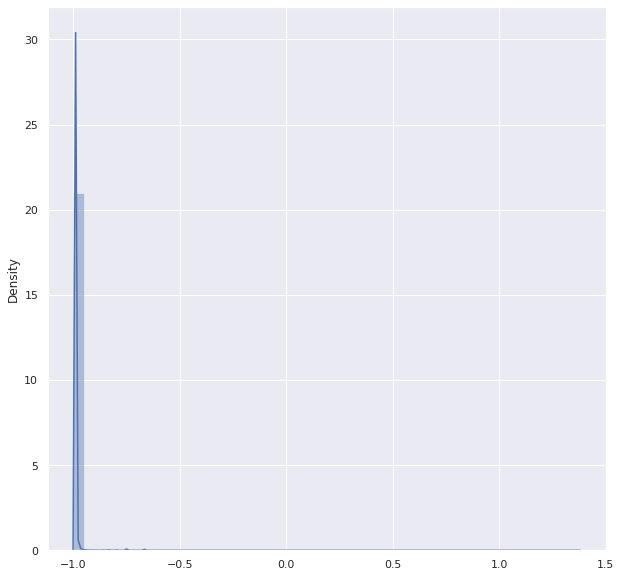

In [30]:
sns.distplot(np.expm1(data_train["log_haversine"] - data_train["log_trip_duration"]), )

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


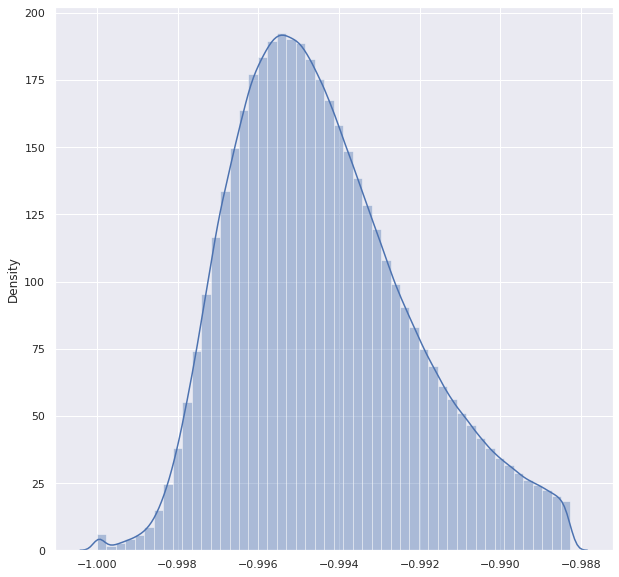

In [31]:
speeds = np.expm1(data_train["log_haversine"] - data_train["log_trip_duration"]).sort_values()
speeds = speeds[:int(speeds.size * 0.95)]
sns.distplot(speeds)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

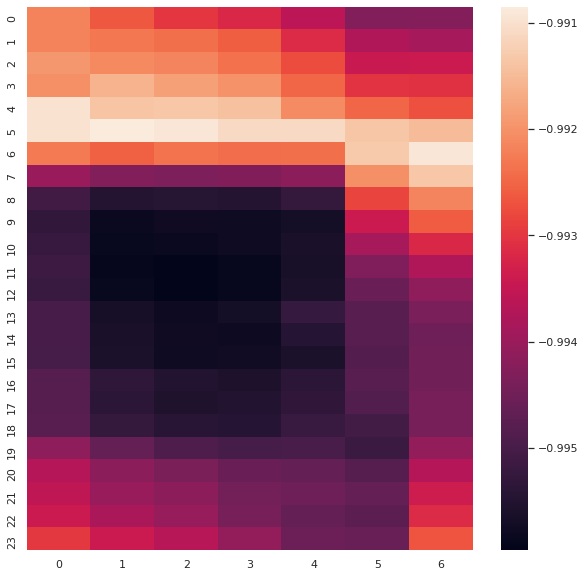

In [32]:
cur = pd.DataFrame({
  "weekday":data_train["pickup_datetime"].dt.dayofweek, 
  "hour":data_train["pickup_datetime"].dt.hour,  
  "speed": np.expm1(data_train["log_haversine"] - data_train["log_trip_duration"]),
}).sort_values("speed")

cur = cur.groupby(["weekday", "hour"]).median()["speed"].reset_index()

cur2d = [[0]*7 for i in range(24)]
for index, row in cur.iterrows():
  cur2d[int(row["hour"])][int(row["weekday"])] = row["speed"]

sns.heatmap(cur2d)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Скорость зависит от других факторов, таких как машина, ограничение скоростное в определенной зоне, и т.д.

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [33]:
def add_roads_columns(data):
  data["is_busy_roads"] = (
      (
        (data["pickup_datetime"].dt.dayofweek >= 0)
        & (data["pickup_datetime"].dt.dayofweek <= 4)
        & (data["pickup_datetime"].dt.hour >= 0)
        & (data["pickup_datetime"].dt.hour <= 6)
      )
      |
      (
        (data["pickup_datetime"].dt.dayofweek >= 5)
        & (data["pickup_datetime"].dt.dayofweek <= 6)
        & (data["pickup_datetime"].dt.hour >= 2)
        & (data["pickup_datetime"].dt.hour <= 10)
      )
    ).map(lambda x: 1 if x else 0)
  data["is_free_roads"] = (
      (data["pickup_datetime"].dt.dayofweek >= 1)
      & (data["pickup_datetime"].dt.dayofweek <= 4)
      & (data["pickup_datetime"].dt.hour >= 8)
      & (data["pickup_datetime"].dt.hour <= 18)
    ).map(lambda x: 1 if x else 0)

add_roads_columns(data_train)
add_roads_columns(data_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [34]:
def add_airports_columns(data):
  airports_latitudes = [40.6527, 40.6939]
  airports_longitudes = [-73.7741, -74.175]
  for i in range(2):
    for prefix in ["pickup", "dropoff"]:
      data[f"{prefix}_distance_airport_{i}"] = haversine_array(
          airports_latitudes[i], 
          airports_longitudes[i], 
          data[f"{prefix}_latitude"], 
          data[f"{prefix}_longitude"]
        )

add_airports_columns(data_train)
add_airports_columns(data_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Посмотрим как отделить точки около аэропорта

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


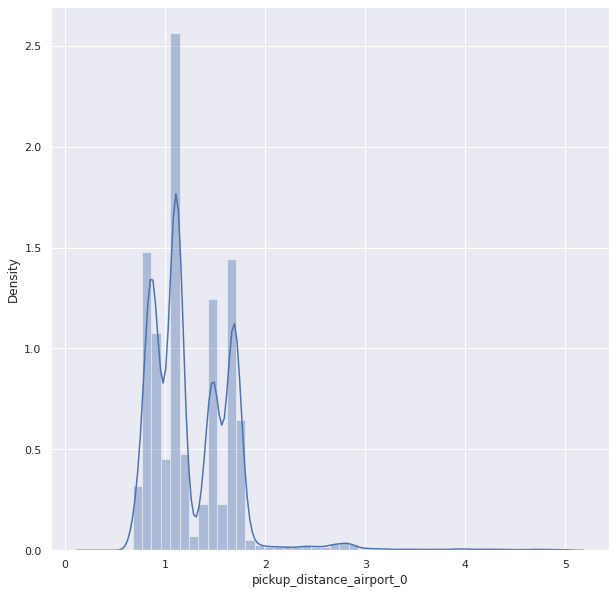

In [35]:
cur = data_train.sort_values("pickup_distance_airport_0")
cur = cur[:int(cur.shape[0] * 0.95)]

sns.distplot(cur[cur["pickup_distance_airport_0"] < 5]["pickup_distance_airport_0"])


Получили такие ограничения

In [36]:
#критерии
#dropoff_distance_airport_1 < 1
#pickup_distance_airport_1  < 1
#dropoff_distance_airport_0 < 2
#pickup_distance_airport_0  < 2

In [37]:
def add_airports_columns1(data):
  data["dropoff_near_airport_1"] = np.where(data["dropoff_distance_airport_1"] < 2, 1.0, 0.0)
  data["pickup_near_airport_1"] = np.where(data["pickup_distance_airport_1"] < 2, 1.0, 0.0)
  data["dropoff_near_airport_0"] = np.where(data["dropoff_distance_airport_0"] < 1, 1.0, 0.0)
  data["pickup_near_airport_0"] = np.where(data["pickup_distance_airport_0"] < 1, 1.0, 0.0)

add_airports_columns1(data_train)
add_airports_columns1(data_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [38]:
def show_circles_on_map_1(data, latitude_column, longitude_column, color, cur_map):
    location = (data[latitude_column].mean(), data[longitude_column].mean())
    if (not cur_map):
      cur_map = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=5,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(cur_map)

    return cur_map

cur_map = False
cur_map = show_circles_on_map_1(data_train[data_train["pickup_near_airport_0"] > 0].sample(200), "pickup_latitude", "pickup_longitude", "blue", cur_map)
cur_map = show_circles_on_map_1(data_train[data_train["pickup_near_airport_1"] > 0].sample(50), "pickup_latitude", "pickup_longitude", "green", cur_map)
cur_map = show_circles_on_map_1(data_train[data_train["dropoff_near_airport_0"] > 0].sample(200), "dropoff_latitude", "dropoff_longitude", "blue", cur_map)
cur_map = show_circles_on_map_1(data_train[data_train["dropoff_near_airport_1"] > 0].sample(200), "dropoff_latitude", "dropoff_longitude", "green", cur_map)

cur_map

Признаки составлены корректно

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

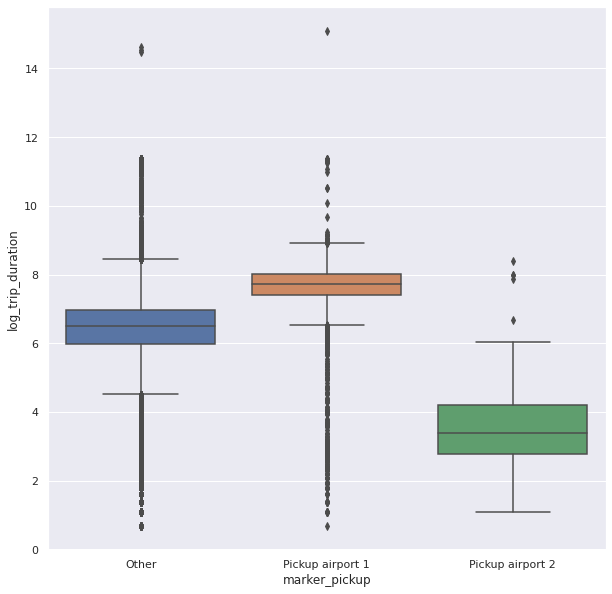

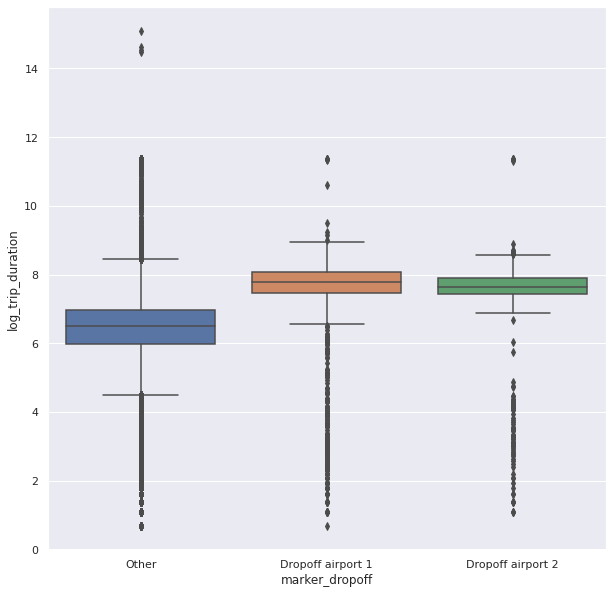

In [39]:
cur = data_train[["pickup_near_airport_0", "pickup_near_airport_1", "dropoff_near_airport_0", "dropoff_near_airport_1", "log_trip_duration"]]
cur["marker_pickup"] = "Other"
cur.loc[cur["pickup_near_airport_0"] > 0, "marker_pickup"] = "Pickup airport 1"
cur.loc[cur["pickup_near_airport_1"] > 0, "marker_pickup"] = "Pickup airport 2"

cur["marker_dropoff"] = "Other"
cur.loc[cur["dropoff_near_airport_0"] > 0, "marker_dropoff"] = "Dropoff airport 1"
cur.loc[cur["dropoff_near_airport_1"] > 0, "marker_dropoff"] = "Dropoff airport 2"

sns.boxplot(data=cur, x="marker_pickup", y="log_trip_duration")
plt.show()
sns.boxplot(data=cur, x="marker_dropoff", y="log_trip_duration")
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: На некоторых распределениях наблюдается на очень сильный разброс (кроме Pickup airport 2), значит такие признаки могуть быть полезны нам

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, latitude_bins = 5, longitude_bins = 5):
    self.latitude_range = (0, 0)
    self.longitude_range = (0, 0)
    self.latitude_bins = latitude_bins
    self.longitude_bins = longitude_bins

  def take_range(self, data):
    cur = data.sort_values(ascending=True)
    return (cur.iloc[int(cur.size * 0.05)], cur.iloc[int(cur.size * 0.95)])

  def fit(self, X, y=None):
    pickup_latitude = self.take_range(X["pickup_latitude"])
    pickup_longitude = self.take_range(X["pickup_longitude"])
    dropoff_latitude = self.take_range(X["dropoff_latitude"])
    dropoff_longitude = self.take_range(X["dropoff_longitude"])
    
    self.latitude_range = (min(pickup_latitude[0], dropoff_latitude[0]), max(pickup_latitude[1], dropoff_latitude[1]))
    self.longitude_range = (min(pickup_longitude[0], dropoff_longitude[0]), max(pickup_longitude[1], dropoff_longitude[1]))
    
    if (self.latitude_range[0] > self.latitude_range[1]):
      self.latitude_range = (self.latitude_range[1], self.latitude_range[0])
    if (self.longitude_range[0] > self.longitude_range[1]):
      self.longitude_range = (self.longitude_range[1], self.longitude_range[0])
    
    return self

  def set_blocks(self, data, result_column, latitude_c, longitude_c):
    x = (((data[latitude_c] - self.latitude_range[0]) / (self.latitude_range[1] - self.latitude_range[0])) / (1.0 / self.latitude_bins)).astype(int)
    y = ((data[longitude_c] - self.longitude_range[0]) / (self.longitude_range[1] - self.longitude_range[0]) / (1.0 / self.longitude_bins)).astype(int)
        
    data[result_column] = x * self.longitude_bins + y
    data.loc[(x < 0) | (x >= self.latitude_bins) | (y < 0) | (y >= self.longitude_bins)] = -1

  def transform(self, X, y=None):
    cur = X.copy()
    self.set_blocks(cur, "pickup_block", "pickup_latitude", "pickup_longitude")
    self.set_blocks(cur, "dropoff_block", "dropoff_latitude", "dropoff_longitude")
    return cur

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [41]:
categorical_features = [
  "dayofweek", 
  "month", 
  "hour", 
  "dayofyear",
  "pickup_block",
  "dropoff_block"
]
numeric_features = [
  "is_first_anomal", 
  "is_second_anomal", 
  "pickup_near_airport_0",
  "pickup_near_airport_1",
  "dropoff_near_airport_0",
  "dropoff_near_airport_1",
  "is_busy_roads",
  "is_free_roads",
]

In [42]:
column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('add_blocks', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(data_train, data_train["log_trip_duration"])
y_train_pred = model.predict(data_train)
y_test_pred = model.predict(data_test)


print("Test MSE = %.4f" % mean_squared_error(data_test["log_trip_duration"], y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(data_train["log_trip_duration"], y_train_pred))

Test MSE = 0.5260
Train MSE = 0.5270


Хорошечно! Работаем дальше

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [43]:
print("Unique:")
columns = ["vendor_id", "passenger_count", "store_and_fwd_flag"]
for column in columns:
  print(column, data_train[column].unique().size)

Unique:
vendor_id 2
passenger_count 10
store_and_fwd_flag 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

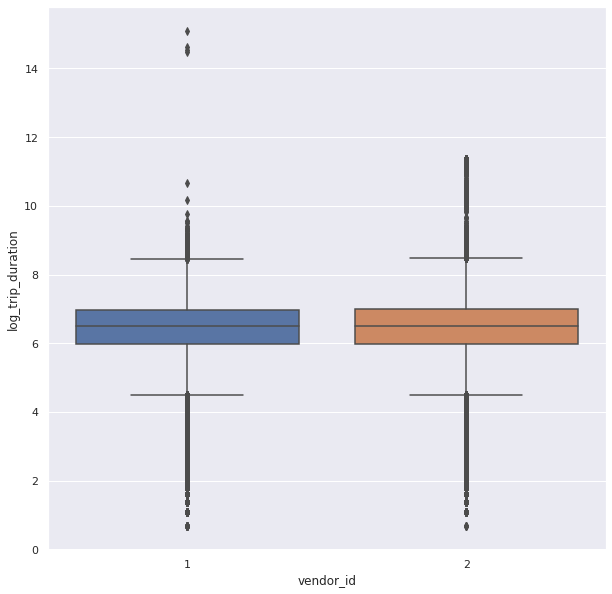

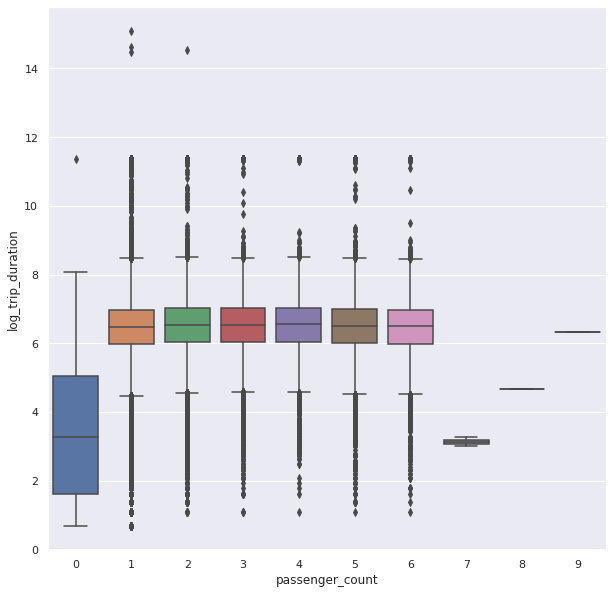

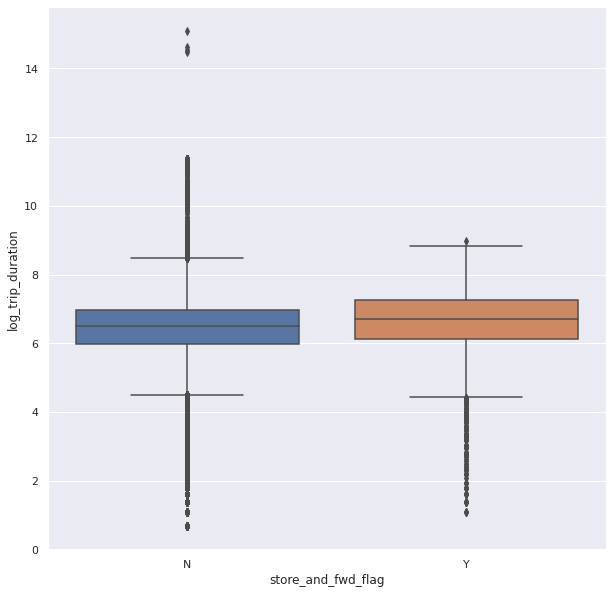

In [44]:
for column in columns:
  sns.boxplot(data=data_train, x=column, y="log_trip_duration")
  plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [45]:
def modify_columns(data):
  data["vendor_id"] = data["vendor_id"] - 1
  data["store_and_fwd_flag"] = np.where(data["store_and_fwd_flag"].equals("N"), 0, 1)
  
modify_columns(data_train)
modify_columns(data_test)

data_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,dayofweek,month,hour,is_first_anomal,is_second_anomal,dayofyear,haversine,log_haversine,is_busy_roads,is_free_roads,pickup_distance_airport_0,dropoff_distance_airport_0,pickup_distance_airport_1,dropoff_distance_airport_1,dropoff_near_airport_1,pickup_near_airport_1,dropoff_near_airport_0,pickup_near_airport_0
0,id2875421,1,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,1,6.122493,0,3,17,0.0,0.0,74,1.498521,0.915699,0,0,21.719081,20.384242,18.215871,19.436882,0.0,0.0,0.0,0.0
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,1,6.498282,6,6,0,0.0,0.0,164,1.805507,1.031584,0,0,19.841769,20.908783,17.135116,15.362533,0.0,0.0,0.0,0.0
3,id3504673,1,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,1,6.063785,2,4,19,0.0,0.0,97,1.485498,0.910473,0,0,21.253800,20.962814,14.203745,13.792197,0.0,0.0,0.0,0.0
4,id2181028,1,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,1,6.077642,5,3,13,0.0,0.0,86,1.188588,0.783257,0,0,22.917405,22.116953,20.282676,19.671524,0.0,0.0,0.0,0.0
6,id1813257,0,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,1,5.834811,4,6,22,0.0,0.0,169,1.326279,0.844270,0,0,20.165167,19.928572,18.757390,20.006678,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,id1454193,1,2016-02-02 00:39:39,5,-73.988823,40.736553,-73.989166,40.757393,1,6.028279,1,2,0,0.0,0.0,33,2.317448,1.199196,1,0,20.362888,21.544730,16.392378,17.177790,0.0,0.0,0.0,0.0
1458639,id2376096,1,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,1,6.658011,4,4,13,0.0,0.0,99,1.225080,0.799793,0,1,20.354227,21.003238,17.232401,16.026031,0.0,0.0,0.0,0.0
1458640,id1049543,0,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,1,6.486161,6,1,7,0.0,0.0,10,6.049836,1.953004,1,0,21.829674,22.997421,15.827884,20.687879,0.0,0.0,0.0,0.0
1458642,id2714485,0,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,1,5.924256,1,1,15,0.0,0.0,5,1.092564,0.738390,0,1,20.547453,20.506522,17.376706,18.289027,0.0,0.0,0.0,0.0


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Распределения очень похожи, я бы предположил что не будет сильного улучшения

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [46]:
categorical_features = [
  "dayofweek", 
  "month", 
  "hour", 
  "dayofyear",
  "pickup_block",
  "dropoff_block",
  "passenger_count",
]
numeric_features = [
  "is_first_anomal", 
  "is_second_anomal", 
  "pickup_near_airport_0",
  "pickup_near_airport_1",
  "dropoff_near_airport_0",
  "dropoff_near_airport_1",
  "is_busy_roads",
  "is_free_roads",
  "vendor_id",
  "store_and_fwd_flag",
]

In [47]:
column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('add_blocks', MapGridTransformer()),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(data_train, data_train["log_trip_duration"])
y_train_pred = model.predict(data_train)
y_test_pred = model.predict(data_test)


print("Test MSE = %.4f" % mean_squared_error(data_test["log_trip_duration"], y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(data_train["log_trip_duration"], y_train_pred))

Test MSE = 0.5255
Train MSE = 0.5265


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Что и требовалось доказать, сильного улучшения не видно, хотя в жизни бы такое улучшение можно было бы считать хорошим, но все-таки удалим

In [48]:
data_train.drop(columns, inplace=True, axis=1)
data_test.drop(columns, inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

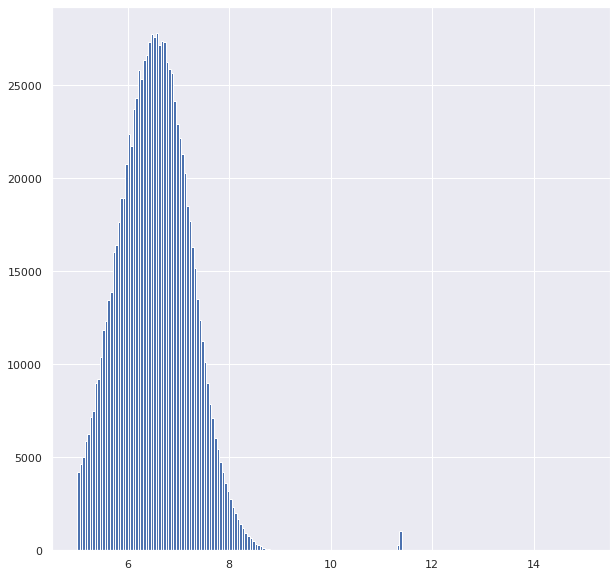

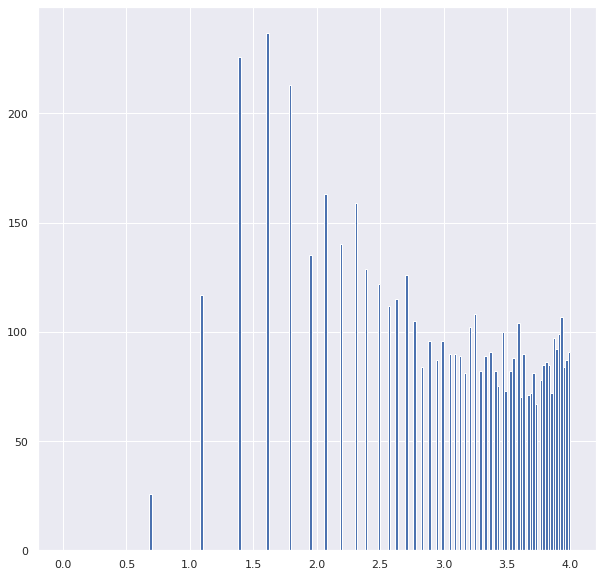

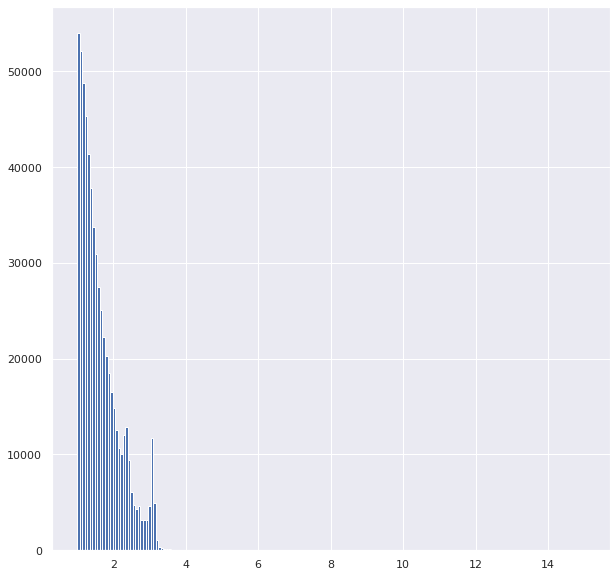

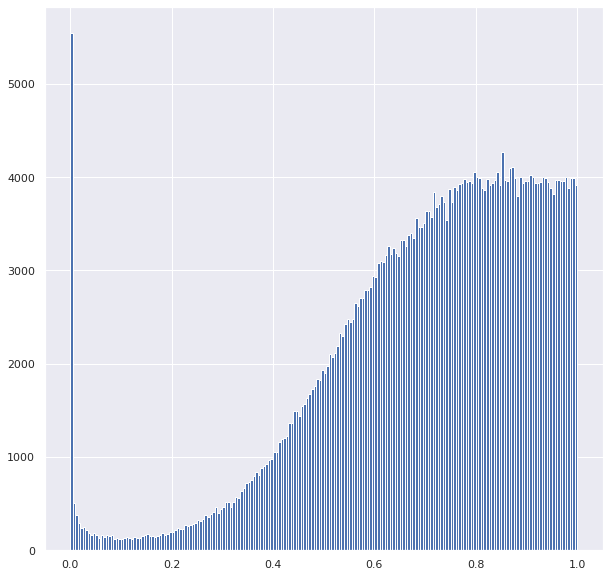

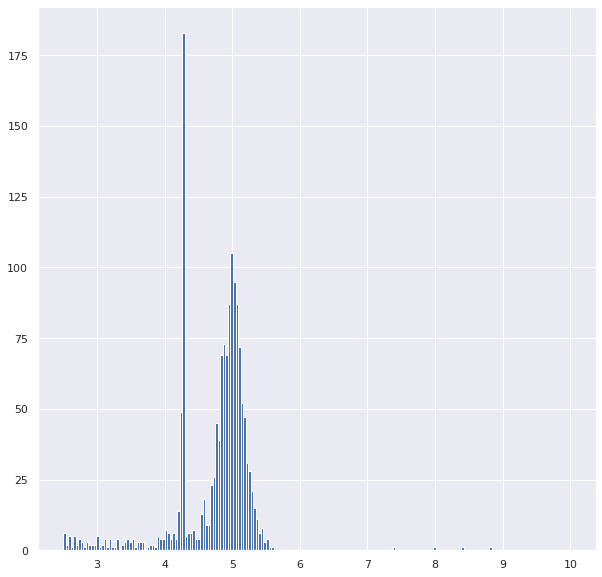

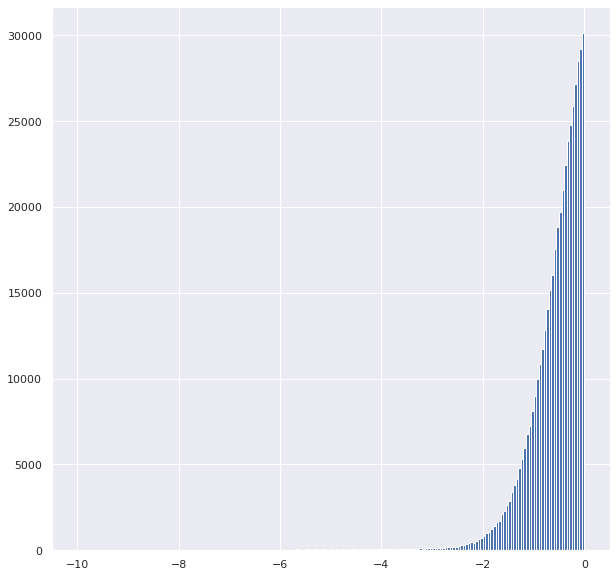

In [49]:
plt.hist(data_train["log_trip_duration"], range=(5, 15), bins=200)
plt.show()

plt.hist(data_train["log_trip_duration"], range=(0, 4), bins=200)
plt.show()

plt.hist(data_train["log_haversine"], range=(1, 15), bins=200)
plt.show()

plt.hist(data_train["log_haversine"], range=(0, 1), bins=200)
plt.show()

plt.hist(data_train["log_trip_duration"] - y_train_pred, range=(2.5, 10), bins=200)
plt.show()

plt.hist(data_train["log_trip_duration"] - y_train_pred, range=(-10, 0), bins=200)
plt.show()

In [50]:
cur = data_train

def delete_trash(data):
  data = data[data["log_trip_duration"] < data["predict"] + 4]
  data = data[data["log_trip_duration"] > 3]
  data = data[data["log_trip_duration"] < 9]
  data = data[data["log_haversine"] < 3]
  data = data[data["log_haversine"] > 0.05]

  return data

cur["predict"] = y_train_pred
cur = delete_trash(cur)

cur.drop("predict", inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [51]:
data_train = cur

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


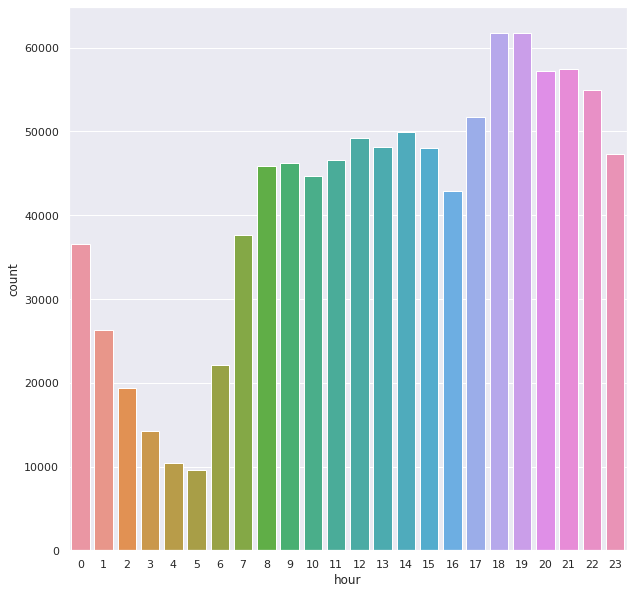

In [52]:
columns = [
  "hour", 
  # "dayofyear", можно не рассматривать, потому что отдельный признаки аномальных периодов компенсируют просадки
]

for column in columns:
  sns.countplot(data_train[column])
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


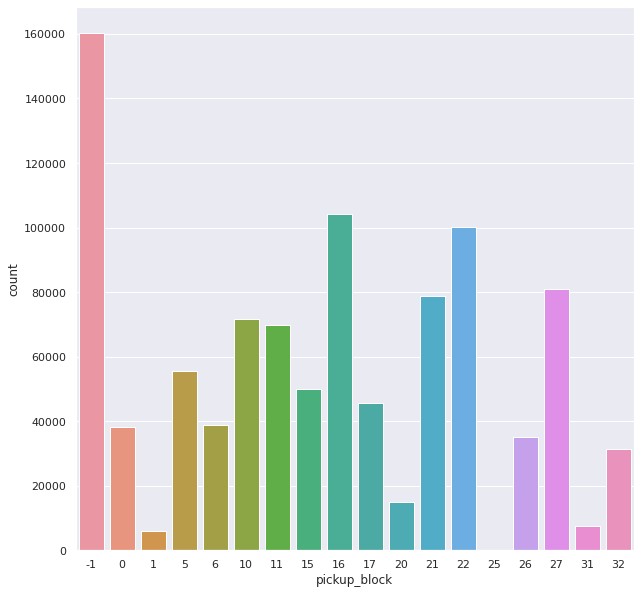

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


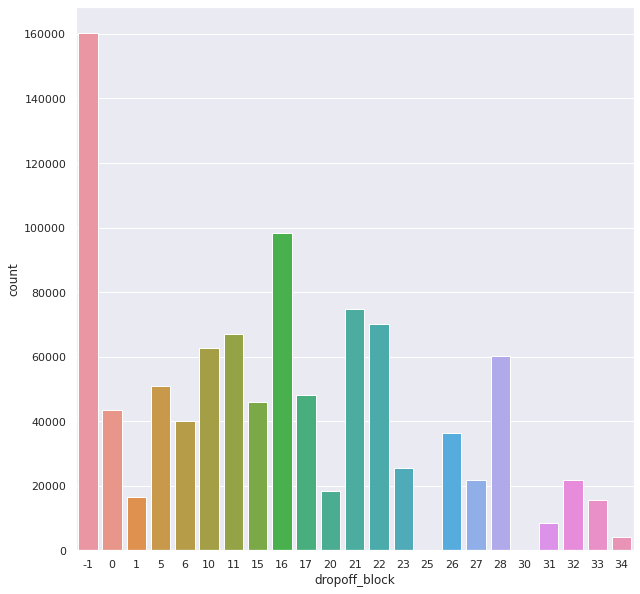

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


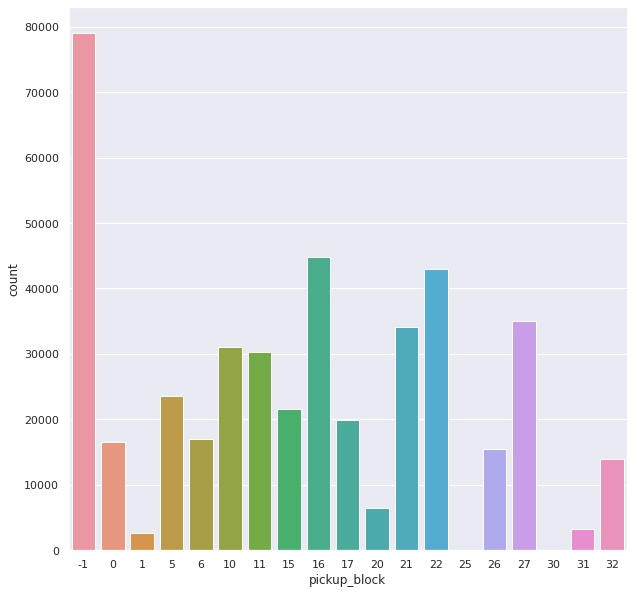

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


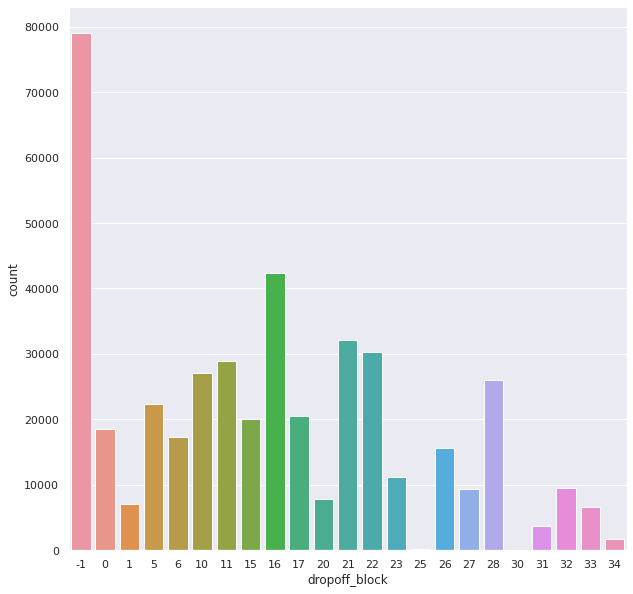

In [53]:
map_transformer = MapGridTransformer(latitude_bins = 7, longitude_bins = 5)
map_transformer.fit(data_train)

def add_blocks_columns(data):
  cur = map_transformer.transform(data)

  columns = [
    "pickup_block",
    "dropoff_block" 
    # "dayofyear", можно не рассматривать, потому что отдельный признаки аномальных периодов компенсируют просадки
  ]

  # cur[(cur["pickup_block"] > 0) & (cur["pickup_block"] < 5)]["pickup_block"] = 1
  # cur[(cur["pickup_block"] > 5) & (cur["pickup_block"] < 10)]["pickup_block"] = 6
  # cur[(cur["pickup_block"] > 10) & (cur["pickup_block"] < 15)]["pickup_block"] = 11
  # cur[(cur["pickup_block"] > 16) & (cur["pickup_block"] < 20)]["pickup_block"] = 17
  # cur[(cur["pickup_block"] > 22) & (cur["pickup_block"] < 25)]["pickup_block"] = 22
  # cur[(cur["pickup_block"] > 27) & (cur["pickup_block"] < 31)]["pickup_block"] = 27
  # cur[(cur["pickup_block"] > 32)]["pickup_block"] = 32

  def zip_pickup_block(x):
    if x > 0 and x < 5:
      return 1
    if x > 5 and x < 10:
      return 6
    if x > 10 and x < 15:
      return 11
    if x > 16 and x < 20:
      return 17  
    if x > 22 and x < 25:
      return 22
    if x > 27 and x < 30:
      return 27
    if x > 32:
      return 32
    return x

  def zip_dropoff_block(x):
    if x > 0 and x < 5:
      return 1
    if x > 5 and x < 10:
      return 6
    if x > 11 and x < 15:
      return 11
    if x > 16 and x < 20:
      return 17  
    if x > 23 and x < 25:
      return 23
    if x > 28 and x < 30:
      return 28
    if x > 34:
      return 34
    return x
      
  cur["pickup_block"] = cur["pickup_block"].apply(
    lambda x: zip_pickup_block(x)
  )

  cur["dropoff_block"] = cur["dropoff_block"].apply(
    lambda x: zip_dropoff_block(x)
  )

  for column in columns:
    sns.countplot(cur[column])
    plt.show()

  return cur

data_train = add_blocks_columns(data_train)
data_test = add_blocks_columns(data_test)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [54]:
data_train

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration,dayofweek,month,hour,is_first_anomal,is_second_anomal,dayofyear,haversine,log_haversine,is_busy_roads,is_free_roads,pickup_distance_airport_0,dropoff_distance_airport_0,pickup_distance_airport_1,dropoff_distance_airport_1,dropoff_near_airport_1,pickup_near_airport_1,dropoff_near_airport_0,pickup_near_airport_0,pickup_block,dropoff_block
0,id2875421,2016-03-14 17:24:55,-73.982155,40.767937,-73.964630,40.765602,6.122493,0,3,17,0.0,0.0,74,1.498521,0.915699,0,0,21.719081,20.384242,18.215871,19.436882,0.0,0.0,0.0,0.0,21,22
1,id2377394,2016-06-12 00:43:35,-73.980415,40.738564,-73.999481,40.731152,6.498282,6,6,0,0.0,0.0,164,1.805507,1.031584,0,0,19.841769,20.908783,17.135116,15.362533,0.0,0.0,0.0,0.0,11,10
3,id3504673,2016-04-06 19:32:31,-74.010040,40.719971,-74.012268,40.706718,6.063785,2,4,19,0.0,0.0,97,1.485498,0.910473,0,0,21.253800,20.962814,14.203745,13.792197,0.0,0.0,0.0,0.0,5,0
4,id2181028,2016-03-26 13:30:55,-73.973053,40.793209,-73.972923,40.782520,6.077642,5,3,13,0.0,0.0,86,1.188588,0.783257,0,0,22.917405,22.116953,20.282676,19.671524,0.0,0.0,0.0,0.0,32,27
6,id1813257,2016-06-17 22:34:59,-73.969017,40.757839,-73.957405,40.765896,5.834811,4,6,22,0.0,0.0,169,1.326279,0.844270,0,0,20.165167,19.928572,18.757390,20.006678,0.0,0.0,0.0,0.0,22,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,id1454193,2016-02-02 00:39:39,-73.988823,40.736553,-73.989166,40.757393,6.028279,1,2,0,0.0,0.0,33,2.317448,1.199196,1,0,20.362888,21.544730,16.392378,17.177790,0.0,0.0,0.0,0.0,11,21
1458639,id2376096,2016-04-08 13:31:04,-73.982201,40.745522,-73.994911,40.740170,6.658011,4,4,13,0.0,0.0,99,1.225080,0.799793,0,1,20.354227,21.003238,17.232401,16.026031,0.0,0.0,0.0,0.0,16,10
1458640,id1049543,2016-01-10 07:35:15,-74.000946,40.747379,-73.970184,40.796547,6.486161,6,1,7,0.0,0.0,10,6.049836,1.953004,1,0,21.829674,22.997421,15.827884,20.687879,0.0,0.0,0.0,0.0,15,32
1458642,id2714485,2016-01-05 15:56:26,-73.982079,40.749062,-73.974632,40.757107,5.924256,1,1,15,0.0,0.0,5,1.092564,0.738390,0,1,20.547453,20.506522,17.376706,18.289027,0.0,0.0,0.0,0.0,16,17


In [55]:
categorical_features = [
  "dayofweek", 
  "month", 
  "hour", 
  "dayofyear",
  "pickup_block",
  "dropoff_block",
]
numeric_features = [
  "is_first_anomal", 
  "is_second_anomal", 
  "pickup_near_airport_0",
  "pickup_near_airport_1",
  "dropoff_near_airport_0",
  "dropoff_near_airport_1",
  "is_busy_roads",
  "is_free_roads",
]

column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(data_train, data_train["log_trip_duration"])
y_train_pred = model.predict(data_train)
y_test_pred = model.predict(data_test)


print("Test MSE = %.4f" % mean_squared_error(data_test["log_trip_duration"], y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(data_train["log_trip_duration"], y_train_pred))

Test MSE = 0.3886
Train MSE = 0.3357


На обучающей выборке сильно улучшилось, а на тестовой не так сильно. 
Скорее всего это из-за того что мы не удалили выбросы в тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [56]:
all_columns = [
  "dayofweek", 
  "month", 
  "hour", 
  "dayofyear",
  "pickup_block",
  "dropoff_block",
  "is_first_anomal", 
  "is_second_anomal", 
  "pickup_near_airport_0",
  "pickup_near_airport_1",
  "dropoff_near_airport_0",
  "dropoff_near_airport_1",
  "is_busy_roads",
  "is_free_roads",
]

print("Before onehot:", len(all_columns))
sum = 0
for column in all_columns:
  sum = sum + len(data_train.groupby(column))

print("After onehot:", sum)

Before onehot: 14
After onehot: 284


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [57]:
from sklearn.linear_model import Lasso

categorical_features = [
  "dayofweek", 
  "month", 
  "hour", 
  "dayofyear",
  "pickup_block",
  "dropoff_block",
]
numeric_features = [
  "is_first_anomal", 
  "is_second_anomal", 
  "pickup_near_airport_0",
  "pickup_near_airport_1",
  "dropoff_near_airport_0",
  "dropoff_near_airport_1",
  "is_busy_roads",
  "is_free_roads",
]

column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(data_train, data_train["log_trip_duration"])
y_train_pred = model.predict(data_train)
y_test_pred = model.predict(data_test)


print("Test MSE = %.4f" % mean_squared_error(data_test["log_trip_duration"], y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(data_train["log_trip_duration"], y_train_pred))

Test MSE = 1.5103
Train MSE = 1.3688


Получилить результаты хуже

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

Text(0, 0.5, 'CV score')

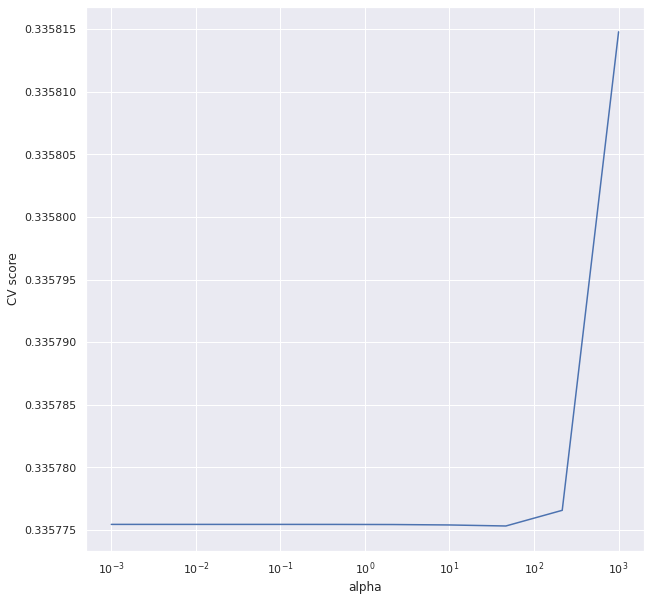

In [58]:
from sklearn.model_selection import GridSearchCV

column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

column_transformer.fit(data_train.drop("log_trip_duration", axis=1))
data_train_scaled = column_transformer.transform(data_train.drop("log_trip_duration", axis=1))

alphas = np.logspace(-3, 3, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_squared_error", cv=5)
searcher.fit(data_train_scaled, data_train["log_trip_duration"])

best_alpha_ridge = searcher.best_params_["alpha"]

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [59]:
column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha_ridge))
])

model = pipeline.fit(data_train.drop("log_trip_duration", axis=1), data_train["log_trip_duration"])
y_train_pred = model.predict(data_train.drop("log_trip_duration", axis=1))
y_test_pred = model.predict(data_test.drop("log_trip_duration", axis=1))


print("Test MSE = %.4f" % mean_squared_error(data_test["log_trip_duration"], y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(data_train["log_trip_duration"], y_train_pred))

Test MSE = 0.3886
Train MSE = 0.3357


Text(0, 0.5, 'CV score')

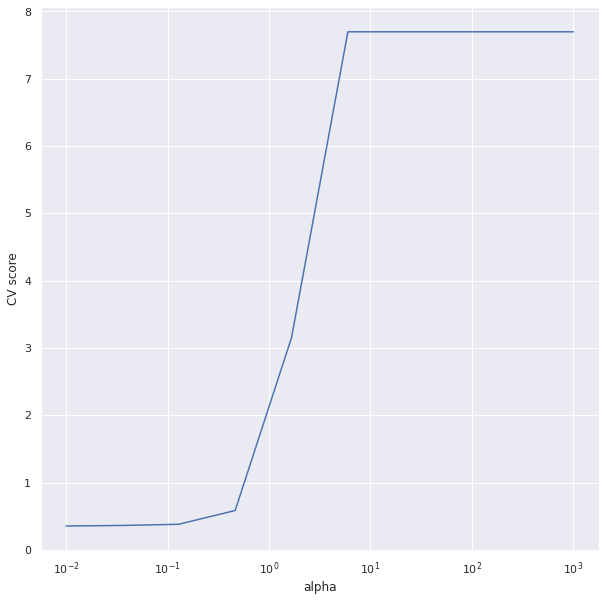

In [60]:
from sklearn.model_selection import GridSearchCV

column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

column_transformer.fit(data_train.drop("log_trip_duration", axis=1))
data_train_scaled = column_transformer.transform(data_train.drop("log_trip_duration", axis=1))

alphas = np.logspace(-2, 3, 10)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_mean_squared_error", cv=5)
searcher.fit(data_train_scaled, data_train["log_trip_duration"])

best_alpha_lasso = searcher.best_params_["alpha"]

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [61]:
column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha_lasso))
])

model = pipeline.fit(data_train, data_train["log_trip_duration"])
y_train_pred = model.predict(data_train)
y_test_pred = model.predict(data_test)


print("Test MSE = %.4f" % mean_squared_error(data_test["log_trip_duration"], y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(data_train["log_trip_duration"], y_train_pred))

Test MSE = 0.4064
Train MSE = 0.3541


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [67]:
column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

alphas = np.logspace(-2, 5, 10)
alphas_stats = pd.DataFrame(columns=["alpha","test_mse","train_mse","zero_coef"])

for alpha in alphas:
  pipeline = Pipeline(steps=[
      ('ohe_and_scaling', column_transformer),
      ('regression', Lasso(alpha))
  ])

  model = pipeline.fit(data_train, data_train["log_trip_duration"])
  y_train_pred = model.predict(data_train)
  y_test_pred = model.predict(data_test)

  test_mse = mean_squared_error(data_test["log_trip_duration"], y_test_pred)
  train_mse = mean_squared_error(data_train["log_trip_duration"], y_train_pred)
  zero_coef = np.sum(pipeline.steps[-1][-1].coef_ == 0)

  cur = {
    "alpha": alpha, "test_mse": test_mse, "train_mse": train_mse, "zero_coef": zero_coef
  }

  alphas_stats = alphas_stats.append(cur, ignore_index=True)


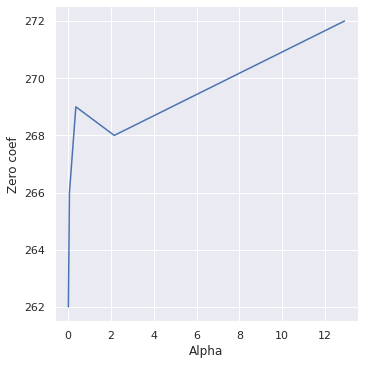

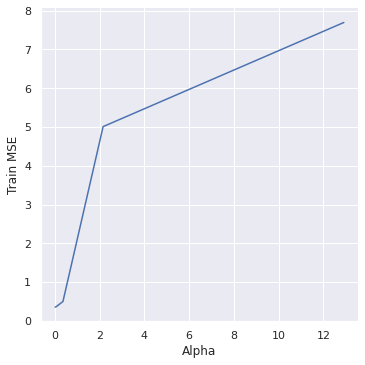

In [72]:
alphas_stats

sns.relplot(
  data=alphas_stats.head(5),
  x="alpha",
  y="zero_coef",
  kind="line",
).set_axis_labels("Alpha", "Zero coef")
plt.show()

sns.relplot(
  data=alphas_stats.head(5),
  x="alpha",
  y="train_mse",
  kind="line",
).set_axis_labels("Alpha", "Train MSE")
plt.show()

Даже при удалении 262 признаков (из 284) можно не потерять точность модели.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [88]:
gr = data_train.groupby(["pickup_block", "dropoff_block"])["id"].count().reset_index(name="count")
gr.loc[gr["pickup_block"] < 0, ["count"]] = -1
gr.loc[gr["dropoff_block"] < 0, "count"] = -1
gr = gr.sort_values("count", ascending=False)
gr = gr.iloc[1:101]

data_train["block_pair"] = [-1] * data_train.shape[0]
data_test["block_pair"] = [-1] * data_test.shape[0]

cur = data_train.copy()
for index, row in gr.iterrows():
  cur.loc[((cur["pickup_block"] == row["pickup_block"]) & (cur["dropoff_block"] == row["dropoff_block"])), "block_pair"] = index

data_train = cur.copy()

cur = data_test.copy()
for index, row in gr.iterrows():
  cur.loc[((cur["pickup_block"] == row["pickup_block"]) & (cur["dropoff_block"] == row["dropoff_block"])), "block_pair"] = index

data_test = cur.copy()

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [117]:
categorical_features = [
  "dayofweek", 
  "month", 
  "hour", 
  "dayofyear",
  "pickup_block",
  "dropoff_block",
  "block_pair"
]
numeric_features = [
  "is_first_anomal", 
  "is_second_anomal", 
  "pickup_near_airport_0",
  "pickup_near_airport_1",
  "dropoff_near_airport_0",
  "dropoff_near_airport_1",
  "is_busy_roads",
  "is_free_roads"
]

column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha_ridge))
])

model = pipeline.fit(data_train.drop("log_trip_duration", axis=1), data_train["log_trip_duration"])
y_train_pred = model.predict(data_train.drop("log_trip_duration", axis=1))
y_test_pred = model.predict(data_test.drop("log_trip_duration", axis=1))


print("Test MSE = %.4f" % mean_squared_error(data_test["log_trip_duration"], y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(data_train["log_trip_duration"], y_train_pred))

Test MSE = 0.2559
Train MSE = 0.2078


Моднейше! Результат на порядок лучше

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [101]:
import math

def rotate(origin, point, angle):
  """
  Rotate a point counterclockwise by a given angle around a given origin.

  The angle should be given in radians.
  """
  ox, oy = origin
  px, py = point

  qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
  qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
  return qx, qy

cur = train.sample(1000)
location = (cur["pickup_latitude"].mean(), cur["pickup_longitude"].mean())
cur_map = folium.Map(location=location)
folium.PolyLine(
    locations=[location, rotate(location, (1 + location[0], location[1]), math.pi * 0.2)],
    color="blue",
).add_to(cur_map)

cur_map

Основная ось выглядит так:

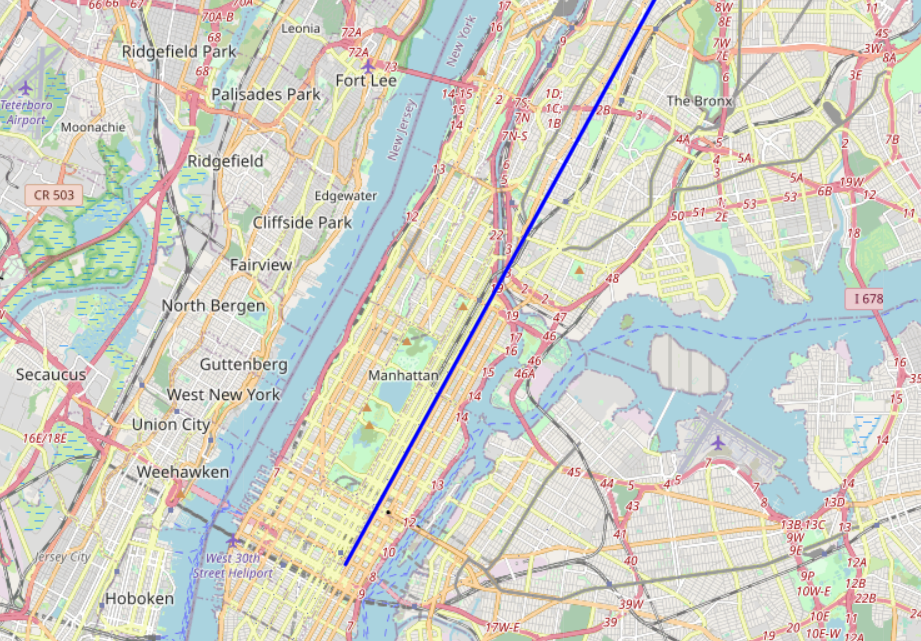

In [103]:
def modify_points(data):
  angle = math.pi * 0.2
  
  ox = [location[0]] * data.shape[0] 
  oy = [location[1]] * data.shape[0]
  px = data["pickup_latitude"]
  py = data["pickup_longitude"] 

  data["pickup_latitude"] = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
  data["pickup_longitude"] = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)

  ox = [location[0]] * data.shape[0] 
  oy = [location[1]] * data.shape[0]
  px = data["dropoff_latitude"]
  py = data["dropoff_longitude"] 

  data["dropoff_latitude"] = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
  data["dropoff_longitude"] = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)

modify_points(data_train)
modify_points(data_test)


In [105]:
def add_manhatan(data):
  data["manhatan"] = np.abs(data["pickup_latitude"] - data["dropoff_latitude"]) + np.abs(data["pickup_longitude"] - data["dropoff_longitude"])
  data["log_mahatan"] = np.log1p(data["manhatan"])

add_manhatan(data_train)
add_manhatan(data_test)


In [110]:
print("Correlation:")
print(data_train[["log_mahatan", "log_haversine", "manhatan"]].corrwith(data_train["log_trip_duration"]))

Correlation:
log_mahatan      0.630184
log_haversine    0.941097
manhatan         0.623748
dtype: float64


Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [114]:
categorical_features = [
  "dayofweek", 
  "month", 
  "hour", 
  "dayofyear",
  "pickup_block",
  "dropoff_block",
  "block_pair"
]
numeric_features = [
  "is_first_anomal", 
  "is_second_anomal", 
  "pickup_near_airport_0",
  "pickup_near_airport_1",
  "dropoff_near_airport_0",
  "dropoff_near_airport_1",
  "is_busy_roads",
  "is_free_roads",
  "log_mahatan" # добавлено
]

column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha_ridge))
])

model = pipeline.fit(data_train.drop("log_trip_duration", axis=1), data_train["log_trip_duration"])
y_train_pred = model.predict(data_train.drop("log_trip_duration", axis=1))
y_test_pred = model.predict(data_test.drop("log_trip_duration", axis=1))

print("With mahatan:")
print("Test MSE = %.4f" % mean_squared_error(data_test["log_trip_duration"], y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(data_train["log_trip_duration"], y_train_pred))

Test MSE = 0.1945
Train MSE = 0.1474


In [115]:
categorical_features = [
  "dayofweek", 
  "month", 
  "hour", 
  "dayofyear",
  "pickup_block",
  "dropoff_block",
  "block_pair"
]
numeric_features = [
  "is_first_anomal", 
  "is_second_anomal", 
  "pickup_near_airport_0",
  "pickup_near_airport_1",
  "dropoff_near_airport_0",
  "dropoff_near_airport_1",
  "is_busy_roads",
  "is_free_roads",
  "log_haversine" # ОТЛИЧИЕ
]

column_transformer = ColumnTransformer([
  ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha_ridge))
])

model = pipeline.fit(data_train.drop("log_trip_duration", axis=1), data_train["log_trip_duration"])
y_train_pred = model.predict(data_train.drop("log_trip_duration", axis=1))
y_test_pred = model.predict(data_test.drop("log_trip_duration", axis=1))

print("With haversine:")
print("Test MSE = %.4f" % mean_squared_error(data_test["log_trip_duration"], y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(data_train["log_trip_duration"], y_train_pred))

With haversine:
Test MSE = 0.1734
Train MSE = 0.1284


С манхэтэнским получается результат хуже, возможно это связано с тем, что манхэтенское расстояние работает хорошо только в центре города, но если учитывать еще и окрестности, то в среднем манхэтенское расстояние будет рабоатть хуже

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.